In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
gtd = pd.read_csv('./gtd-clean.csv')

In [3]:
gtd.head()

,iyear,extended,country,country_txt,region,region_txt,latitude,longitude,specificity,vicinity,...,nkill,nwound,property,propextent,propextent_txt,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1970,0,58,Dominican Republic,2,Central America & Caribbean,18.456792,-69.951164,1,0,...,1,0,0,3,Minor (likely < $1 million),0,0,0,0,0
1,1970,0,130,Mexico,1,North America,19.432608,-99.133207,1,0,...,0,0,0,3,Minor (likely < $1 million),0,1,1,1,0
2,1970,0,160,Philippines,5,Southeast Asia,15.478598,120.599741,4,0,...,1,0,0,3,Minor (likely < $1 million),-9,-9,1,1,0
3,1970,0,78,Greece,8,Western Europe,37.983773,23.728157,1,0,...,0,0,1,4,Unknown,-9,-9,1,1,0
4,1970,0,101,Japan,4,East Asia,33.580412,130.396361,1,0,...,0,0,1,4,Unknown,-9,-9,1,1,0


In [4]:
gtd.tail()

,iyear,extended,country,country_txt,region,region_txt,latitude,longitude,specificity,vicinity,...,nkill,nwound,property,propextent,propextent_txt,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
170345,2016,0,146,Niger,11,Sub-Saharan Africa,13.883032,13.177504,1,0,...,15,7,0,3,Minor (likely < $1 million),1,1,0,1,0
170346,2016,0,160,Philippines,5,Southeast Asia,7.027067,124.386552,1,0,...,0,0,-9,4,Unknown,-9,-9,0,-9,0
170347,2016,1,229,Democratic Republic of the Congo,11,Sub-Saharan Africa,4.308611,25.091389,2,0,...,0,0,0,3,Minor (likely < $1 million),1,1,0,1,0
170348,2016,0,130,Mexico,1,North America,26.819644,-107.069898,1,0,...,0,0,1,3,Minor (likely < $1 million),-9,-9,0,-9,0
170349,2016,0,195,Sudan,11,Sub-Saharan Africa,12.961401,24.044116,1,0,...,0,0,0,3,Minor (likely < $1 million),0,0,0,0,0


In [12]:
bombings = []
for yr in range(1970, 2017):
    bombings.append(len(gtd[(gtd['iyear'] == yr) & (gtd['attacktype1'] == 3)]))

<Container object of 47 artists>

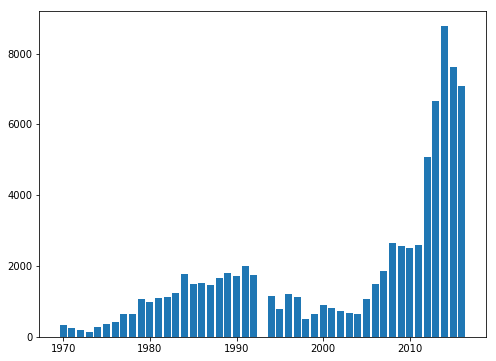

In [13]:
plt.figure(figsize=(8, 6))
plt.bar(range(1970, 2017), bombings)
#there seems to be a trendline from 1990 to 1995-ish

In [14]:
df_bomb = pd.DataFrame(columns=["year", "total_bombings"])
years = list(range(1970, 2017))
years.remove(1993)
bombings.remove(0)
df_bomb['year'] = years
df_bomb['total_bombings'] = bombings
df_bomb.head()

,year,total_bombings
0,1970,333
1,1971,238
2,1972,188
3,1973,149
4,1974,284


In [15]:
reg_bombings = {}
for reg in gtd['region'].unique():
    bmb_yr = []
    for yr in years:
        bmb_yr.append(len(gtd[((gtd['iyear'] == yr) & (gtd['attacktype1'] == 3)) & (gtd['region'] == reg)]))
    reg_bombings[reg] = bmb_yr
for key in reg_bombings.keys():
    df_bomb["reg" + str(key)] = reg_bombings[key]
df_bomb.head()

,year,total_bombings,reg2,reg1,reg5,reg8,reg4,reg3,reg9,reg11,reg10,reg12,reg6,reg7
0,1970,333,0,278,6,15,0,11,8,0,14,1,0,0
1,1971,238,0,143,3,51,1,3,0,0,36,1,0,0
2,1972,188,3,40,3,108,0,8,1,0,23,2,0,0
3,1973,149,1,22,1,88,0,22,1,0,14,0,0,0
4,1974,284,6,76,0,125,0,44,1,3,27,0,2,0


In [16]:
df_bomb.rename(columns={'reg1':'north_amer', 'reg2': 'cent_amer', 'reg3': 'south_amer', 'reg4': 'east_asia',
                        'reg5':'se_asia', 'reg6':'south_asia', 'reg7': 'cent_asia', 'reg8': 'w_europe',
                        'reg9':'e_europe', 'reg10': 'meast_noraf', 'reg11': 'ssafrica', 'reg12': 'oceania'}, inplace=True)
df_bomb.set_index('year', inplace=True)

In [25]:
df_bomb.head()

,total_bombings,cent_amer,north_amer,se_asia,w_europe,east_asia,south_amer,e_europe,ssafrica,meast_noraf,oceania,south_asia,cent_asia
year,,,,,,,,,,,,,
1970,333,0,278,6,15,0,11,8,0,14,1,0,0
1971,238,0,143,3,51,1,3,0,0,36,1,0,0
1972,188,3,40,3,108,0,8,1,0,23,2,0,0
1973,149,1,22,1,88,0,22,1,0,14,0,0,0
1974,284,6,76,0,125,0,44,1,3,27,0,2,0


In [69]:
rolling_tbomb = df_bomb.rolling(5, center=True)['total_bombings'].mean()
#we're using 5 and centering as a range because of that trend from 1990 to 1995

In [68]:
(rolling_tbomb[1992] + rolling_tbomb[1994]) / 2

1428.8000000000002

In [49]:
bomb1 = []
for yr in range(1970, 1993):
    bomb1.append(len(gtd[(gtd['iyear'] == yr) & (gtd['attacktype1'] == 3)]))
bomb1.append(1429)
for yr in range(1994, 2017):
    bomb1.append(len(gtd[(gtd['iyear'] == yr) & (gtd['attacktype1'] == 3)]))

<Container object of 47 artists>

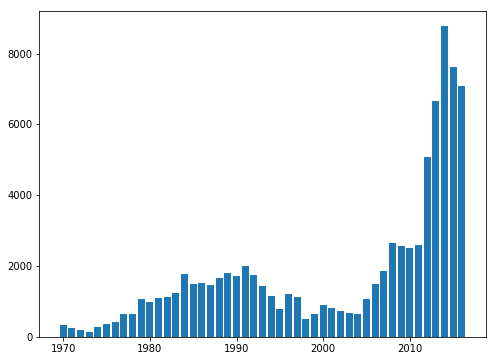

In [50]:
plt.figure(figsize=(8,6))
plt.bar(range(1970, 2017), bomb1)

In [100]:
#finding regional rolling means
regbomb = pd.DataFrame()
for col in df_bomb.drop('total_bombings', axis=1).columns:
    regbomb[col] = df_bomb.rolling(5, center=True)[col].mean()
regbomb.dropna(inplace=True)
regbomb.head()

,cent_amer,north_amer,se_asia,w_europe,east_asia,south_amer,e_europe,ssafrica,meast_noraf,oceania,south_asia,cent_asia
year,,,,,,,,,,,,
1972,2.0,111.8,2.6,77.4,0.2,17.6,2.2,0.6,22.8,0.8,0.4,0.0
1973,2.0,82.8,2.0,107.4,2.4,20.4,0.6,1.2,25.6,0.6,0.8,0.0
1974,7.6,70.0,2.0,144.0,2.4,26.0,0.6,1.8,25.8,0.4,1.4,0.0
1975,8.0,80.4,2.0,185.0,3.2,35.4,0.6,3.4,51.8,0.0,1.6,0.0
1976,19.2,89.4,5.6,232.6,3.8,45.6,0.6,7.8,63.6,0.4,1.8,0.0


In [154]:
#summing all the regions
bombsum = regbomb.sum(axis=1)
bombsum = bombsum.astype(int)
bombsum

year
1972     238
1973     245
1974     281
1975     371
1976     470
1977     625
1978     750
1979     883
1980     981
1981    1101
1982    1245
1983    1342
1984    1427
1985    1497
1986    1578
1987    1582
1988    1632
1989    1728
1990    1780
1991    1681
1992    1480
1994    1377
1995    1204
1996     957
1997     857
1998     880
1999     796
2000     716
2001     751
2002     752
2003     784
2004     924
2005    1152
2006    1548
2007    1930
2008    2219
2009    2437
2010    3080
2011    3883
2012    5124
2013    6144
2014    7041
dtype: int64

In [155]:
#building comparison
equal = 0
for bmb1 in rolling_tbomb.dropna().astype(int):
    for bmb2 in bombsum:
        if bmb1 == bmb2:
            equal += 1
if len(bombsum) == equal:
    print("All equal")
else:
    print(str(equal) + " of " + str(len(bombsum)) + " equal")

41 of 42 equal


In [104]:
#if they're nearly all equal, we can just use the total number, then.
#and we can go through all the rest of the attack types similarly
num_atk = {}
for atk in gtd['attacktype1'].unique():
    attacks = []
    for yr in years:
        attacks.append(len(gtd[(gtd['iyear'] == yr) & (gtd['attacktype1'] == atk)]))
    num_atk[atk] = attacks
num_atk

{1: [22,
  70,
  193,
  164,
  158,
  181,
  204,
  146,
  263,
  526,
  618,
  405,
  362,
  360,
  443,
  311,
  371,
  495,
  821,
  980,
  877,
  730,
  1111,
  771,
  729,
  478,
  420,
  24,
  61,
  103,
  127,
  73,
  86,
  104,
  225,
  140,
  140,
  219,
  227,
  360,
  342,
  458,
  846,
  919,
  924,
  815],
 2: [61,
  44,
  63,
  62,
  46,
  81,
  124,
  255,
  241,
  447,
  574,
  697,
  665,
  852,
  823,
  659,
  592,
  798,
  921,
  1121,
  876,
  1271,
  1327,
  818,
  740,
  638,
  826,
  264,
  367,
  492,
  582,
  366,
  310,
  258,
  510,
  737,
  849,
  1092,
  1116,
  1111,
  1393,
  2078,
  2958,
  4066,
  3339,
  2713],
 3: [333,
  238,
  188,
  149,
  284,
  370,
  419,
  635,
  644,
  1057,
  997,
  1082,
  1125,
  1246,
  1776,
  1482,
  1506,
  1477,
  1649,
  1797,
  1731,
  1988,
  1738,
  1153,
  791,
  1217,
  1123,
  504,
  652,
  904,
  801,
  721,
  680,
  656,
  1063,
  1500,
  1864,
  2660,
  2566,
  2509,
  2589,
  5079,
  6672,
  8775,
  7608,
  

In [113]:
df_atk = pd.DataFrame()
df_atk['year'] = years
df_atk.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [116]:
for atk in num_atk.keys():
    df_atk["atk" + str(atk)] = num_atk[atk]
df_atk.head()

,year,atk1,atk6,atk7,atk2,atk4,atk9,atk8,atk5,atk3
0,1970,22,38,174,61,11,6,3,3,333
1,1971,70,20,88,44,6,3,0,1,238
2,1972,193,16,19,63,12,1,0,4,188
3,1973,164,43,36,62,8,1,3,7,149
4,1974,158,37,42,46,3,1,4,5,284


In [118]:
df_atk.drop("atk3", axis=1, inplace=True)
df_atk.rename(columns={"atk1": "assassination", "atk2": "armed_assault", "atk4": "hijacking", "atk5": "hostage_barr",
                       "atk6": "kidnapping", "atk7":  "fac_infra", "atk8": "unarmed_assault", "atk9": "unknown"}, inplace=True)
df_atk.head()

,year,assassination,kidnapping,fac_infra,armed_assault,hijacking,unknown,unarmed_assault,hostage_barr
0,1970,22,38,174,61,11,6,3,3
1,1971,70,20,88,44,6,3,0,1
2,1972,193,16,19,63,12,1,0,4
3,1973,164,43,36,62,8,1,3,7
4,1974,158,37,42,46,3,1,4,5


In [122]:
df_atk.set_index('year', inplace=True)
df_atk.head()

,assassination,kidnapping,fac_infra,armed_assault,hijacking,unknown,unarmed_assault,hostage_barr
year,,,,,,,,
1970,22,38,174,61,11,6,3,3
1971,70,20,88,44,6,3,0,1
1972,193,16,19,63,12,1,0,4
1973,164,43,36,62,8,1,3,7
1974,158,37,42,46,3,1,4,5


In [127]:
rolling_atk = {}
for col in df_atk.columns:
    rollatk = df_atk.rolling(5, center=True)[col].mean()
    rolling_atk[col] = (rollatk[1992] + rollatk[1994]) / 2
rolling_atk

{'armed_assault': 982.5999999999999,
 'assassination': 803.7,
 'fac_infra': 303.0,
 'hijacking': 26.3,
 'hostage_barr': 20.2,
 'kidnapping': 171.5,
 'unarmed_assault': 49.2,
 'unknown': 168.0}

In [128]:
for atk in rolling_atk.keys():
    rolling_atk[atk] = int(round(rolling_atk[atk], 0))
rolling_atk

{'armed_assault': 983,
 'assassination': 804,
 'fac_infra': 303,
 'hijacking': 26,
 'hostage_barr': 20,
 'kidnapping': 172,
 'unarmed_assault': 49,
 'unknown': 168}

In [131]:
for atk in rolling_atk.keys():
    df_atk.set_value(1993, atk, rolling_atk[atk])

In [133]:
for col in df_atk.columns:
    df_atk[col] = df_atk[col].astype(int)

In [135]:
df_atk.tail()

,assassination,kidnapping,fac_infra,armed_assault,hijacking,unknown,unarmed_assault,hostage_barr
year,,,,,,,,
2013,846,629,556,2958,17,253,39,26
2014,919,1392,782,4066,48,779,53,46
2015,924,1185,703,3339,37,881,95,80
2016,815,1109,688,2713,43,915,70,60
1993,804,172,303,983,26,168,49,20


In [137]:
df_atk.sort_index(inplace=True)

In [138]:
df_atk

,assassination,kidnapping,fac_infra,armed_assault,hijacking,unknown,unarmed_assault,hostage_barr
year,,,,,,,,
1970,22,38,174,61,11,6,3,3
1971,70,20,88,44,6,3,0,1
1972,193,16,19,63,12,1,0,4
1973,164,43,36,62,8,1,3,7
1974,158,37,42,46,3,1,4,5
1975,181,27,64,81,1,3,0,13
1976,204,45,113,124,4,5,3,6
1977,146,67,182,255,7,14,0,13
1978,263,97,181,241,0,52,5,43


Text(0.5,1,'Assassinations')

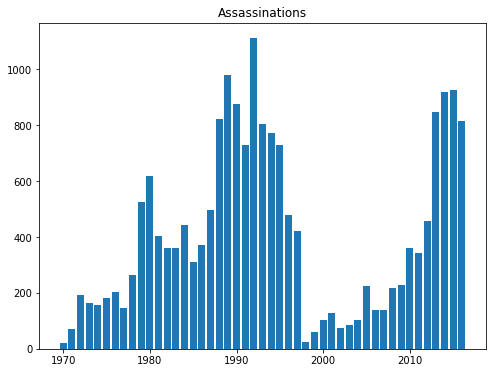

In [139]:
plt.figure(figsize=(8,6))
plt.bar(range(1970, 2017), df_atk['assassination'])
plt.title('Assassinations')

Text(0.5,1,'Armed Assaults')

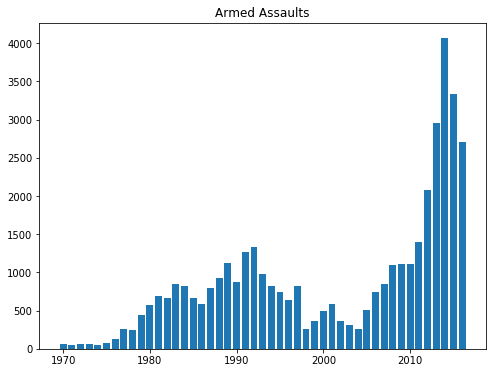

In [140]:
plt.figure(figsize=(8,6))
plt.bar(range(1970, 2017), df_atk['armed_assault'])
plt.title('Armed Assaults')

Text(0.5,1,'Hijackings')

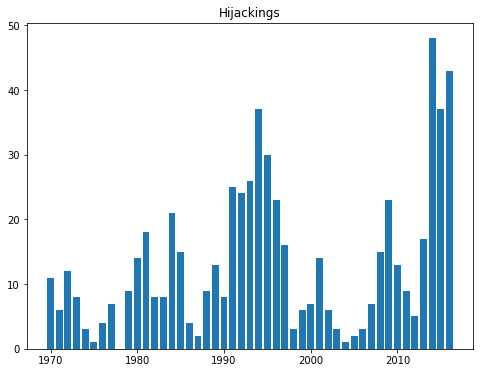

In [141]:
plt.figure(figsize=(8,6))
plt.bar(range(1970, 2017), df_atk['hijacking'])
plt.title('Hijackings')

Text(0.5,1,'Barricaded Hostage Situations')

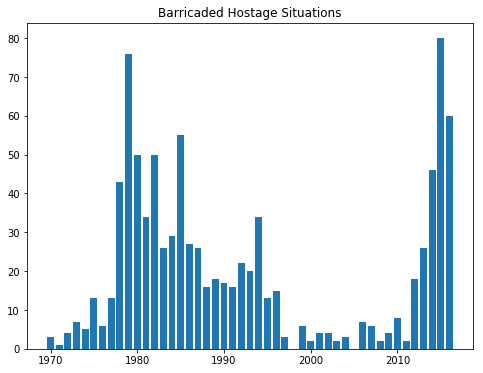

In [142]:
plt.figure(figsize=(8,6))
plt.bar(range(1970, 2017), df_atk['hostage_barr'])
plt.title('Barricaded Hostage Situations')

Text(0.5,1,'Kidnappings')

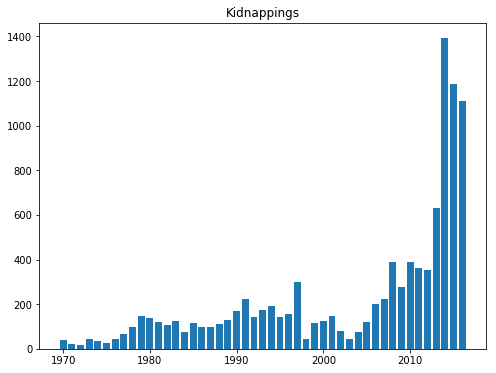

In [143]:
plt.figure(figsize=(8,6))
plt.bar(range(1970, 2017), df_atk['kidnapping'])
plt.title('Kidnappings')

Text(0.5,1,'Facility/Infrastructure Attacks')

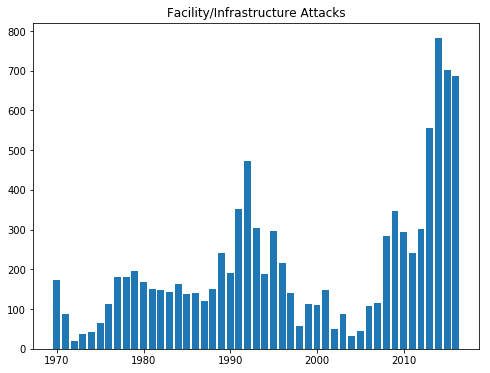

In [144]:
plt.figure(figsize=(8,6))
plt.bar(range(1970, 2017), df_atk['fac_infra'])
plt.title('Facility/Infrastructure Attacks')

Text(0.5,1,'Unarmed Assaults')

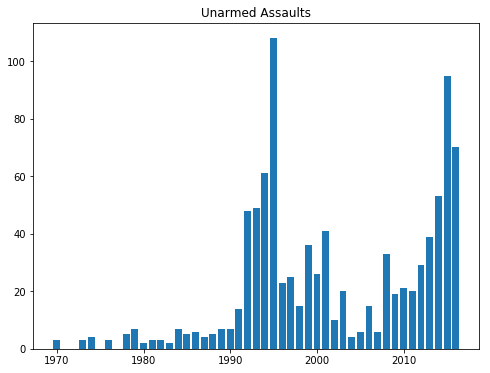

In [145]:
plt.figure(figsize=(8,6))
plt.bar(range(1970, 2017), df_atk['unarmed_assault'])
plt.title('Unarmed Assaults')

Text(0.5,1,'Attacks of Unknown Type')

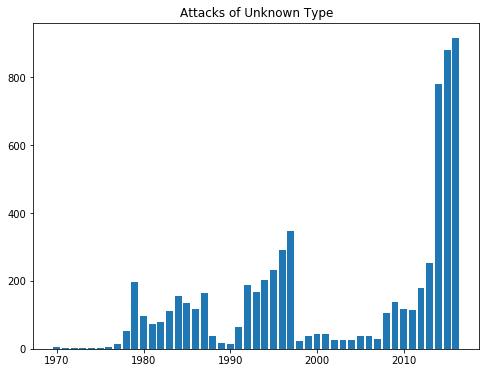

In [146]:
plt.figure(figsize=(8,6))
plt.bar(range(1970, 2017), df_atk['unknown'])
plt.title('Attacks of Unknown Type')

In [147]:
df_atk['bombing'] = bomb1
df_atk

,assassination,kidnapping,fac_infra,armed_assault,hijacking,unknown,unarmed_assault,hostage_barr,bombing
year,,,,,,,,,
1970,22,38,174,61,11,6,3,3,333
1971,70,20,88,44,6,3,0,1,238
1972,193,16,19,63,12,1,0,4,188
1973,164,43,36,62,8,1,3,7,149
1974,158,37,42,46,3,1,4,5,284
1975,181,27,64,81,1,3,0,13,370
1976,204,45,113,124,4,5,3,6,419
1977,146,67,182,255,7,14,0,13,635
1978,263,97,181,241,0,52,5,43,644


In [150]:
df_atk.sum(axis = 1)

year
1970      651
1971      470
1972      496
1973      473
1974      580
1975      740
1976      923
1977     1319
1978     1526
1979     2661
1980     2662
1981     2585
1982     2545
1983     2870
1984     3495
1985     2915
1986     2860
1987     3184
1988     3720
1989     4323
1990     3887
1991     4683
1992     5073
1993     3954
1994     3458
1995     3081
1996     3056
1997     3200
1998      933
1999     1395
2000     1813
2001     1907
2002     1332
2003     1262
2004     1162
2005     2009
2006     2749
2007     3241
2008     4803
2009     4719
2010     4822
2011     5071
2012     8500
2013    11996
2014    16860
2015    14852
2016    13488
dtype: int64

Text(0.5,1,'Sum of All Attacks, Per Year')

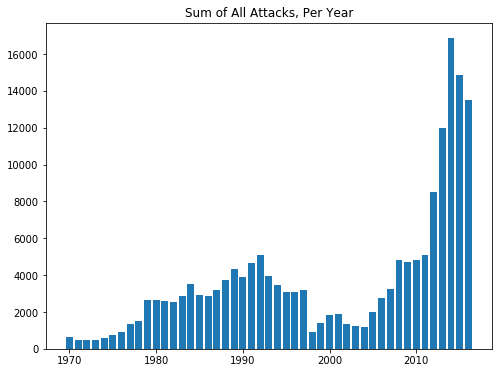

In [156]:
plt.figure(figsize=(8,6))
plt.bar(range(1970, 2017), df_atk.sum(axis=1))
plt.title('Sum of All Attacks, Per Year')

In [157]:
df_atk.loc[1993]

assassination       804
kidnapping          172
fac_infra           303
armed_assault       983
hijacking            26
unknown             168
unarmed_assault      49
hostage_barr         20
bombing            1429
Name: 1993, dtype: int64

In [ ]:
f